In [1]:
!pip3 uninstall -y opencv-contrib-python 
!pip3 uninstall -y opencv-python

!pip3 install opencv-contrib-python
!pip3 install opencv-python

Found existing installation: opencv-contrib-python 4.5.5.64
Uninstalling opencv-contrib-python-4.5.5.64:
  Successfully uninstalled opencv-contrib-python-4.5.5.64
Found existing installation: opencv-python 4.5.5.64
Uninstalling opencv-python-4.5.5.64:
  Successfully uninstalled opencv-python-4.5.5.64
  Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (66.7 MB)
  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math
import cv2

# SIFT descriptor

In [3]:
def sift_detect(img1, img2):
    gray_img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray_img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)    

    sift_detector = cv.SIFT_create()
    (keypoints1, descriptions1) = sift_detector.detectAndCompute(gray_img1, None)
    (keypoints2, descriptions2) = sift_detector.detectAndCompute(gray_img2, None)

    print("Keypoints: {}, descriptors: {}".format(len(keypoints1), descriptions1.shape))
    print("Keypoints: {}, descriptors: {}".format(len(keypoints2), descriptions2.shape)) 
    return keypoints1, descriptions1, keypoints2, descriptions2

# Brute-Force opencv matcher

In [4]:
def brute_force_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2):
    bf = cv.BFMatcher(cv.NORM_L1)
    matches = bf.knnMatch(descs1,descs2, k=2)    # typo fixed

    # Apply ratio Lowe's test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv.drawMatchesKnn(img1, kps1, img2, kps2, good[1:20], None, flags=2)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show() 

# Own matcher

In [5]:
def own_mathcher(kps1, descs1, kps2, descs2,img1, img2):
    matches = []
    for i, k1 in enumerate(descs1):
        for j, k2 in enumerate(descs2):
            matches.append(cv.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    img3 = cv.drawMatches(img1, kps1, img2, kps2, matches[:20], None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()

# Experiment 1

In [6]:
book = cv.imread('book.jpg')
books = cv.imread('books.jpg')

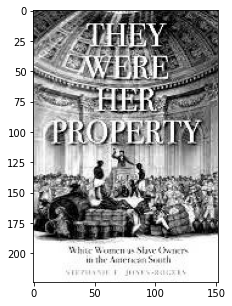

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(book, cmap='gray')

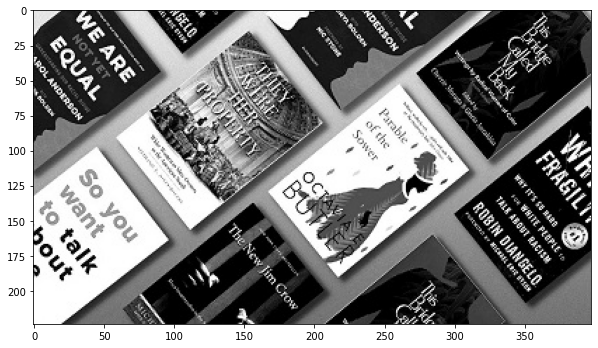

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(books, cmap='gray')

In [9]:
kps1, descs1, kps2, descs2 = sift_detect(book, books)

Keypoints: 561, descriptors: (561, 128)
Keypoints: 826, descriptors: (826, 128)


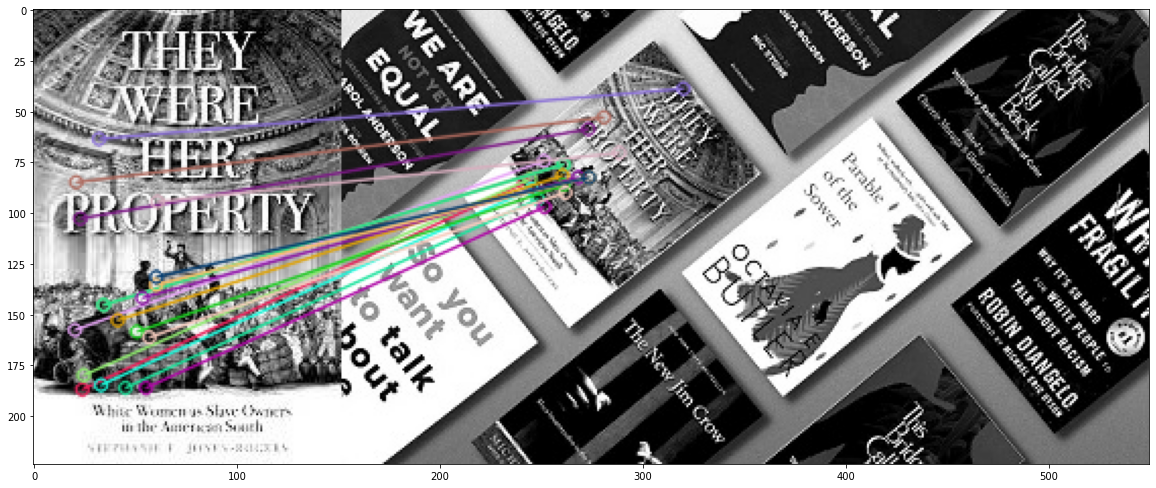

In [10]:
brute_force_opencv_matcher(kps1, descs1, kps2, descs2,book, books)

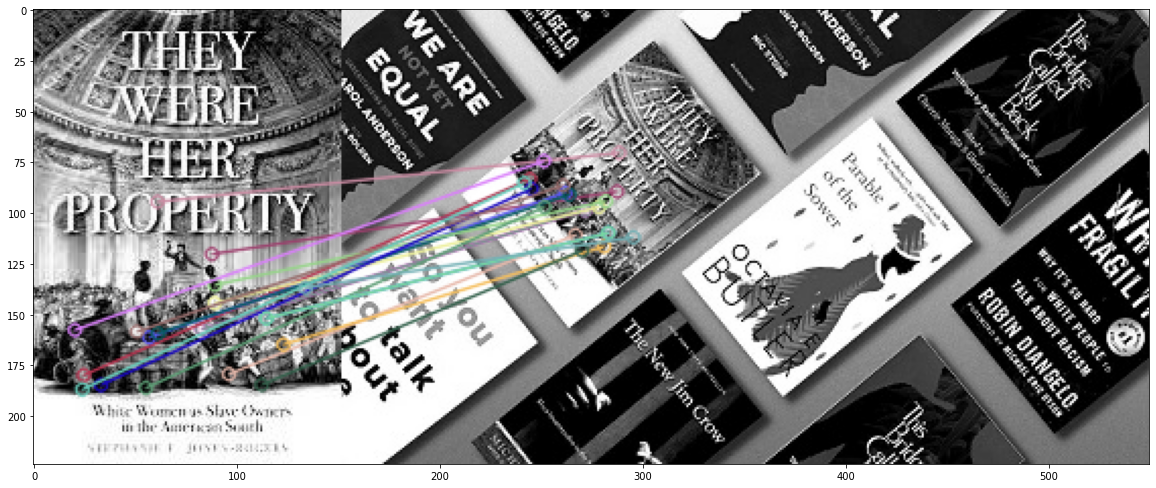

In [11]:
own_mathcher(kps1, descs1, kps2, descs2,book,books)

# Experiment 2

In [12]:
book2 = cv.imread('book_col.jpg')
books2 = cv.imread('books_color.jpg')

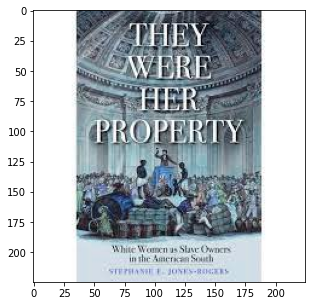

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(book2)

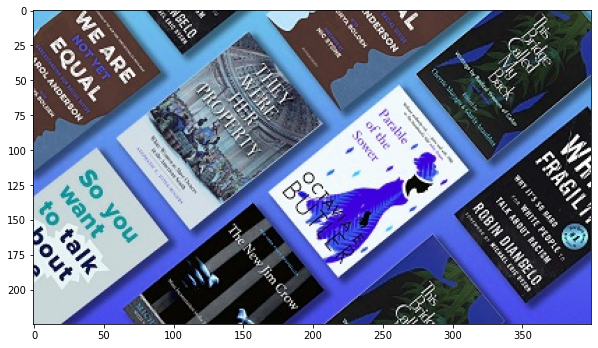

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(books2)

In [15]:
kps1_2, descs1_2, kps2_2, descs2_2 = sift_detect(book2, books2)

Keypoints: 492, descriptors: (492, 128)
Keypoints: 734, descriptors: (734, 128)


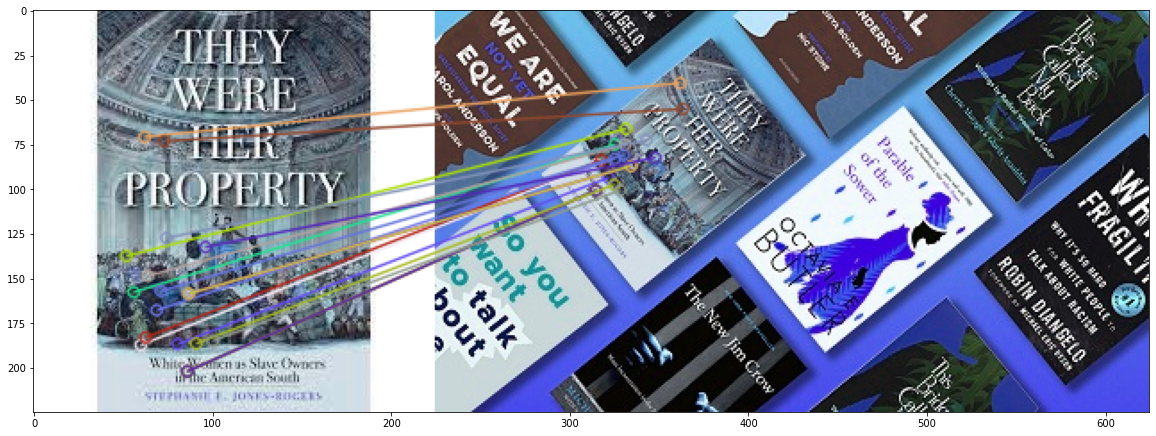

In [17]:
brute_force_opencv_matcher(kps1_2, descs1_2, kps2_2, descs2_2,book2, books2)

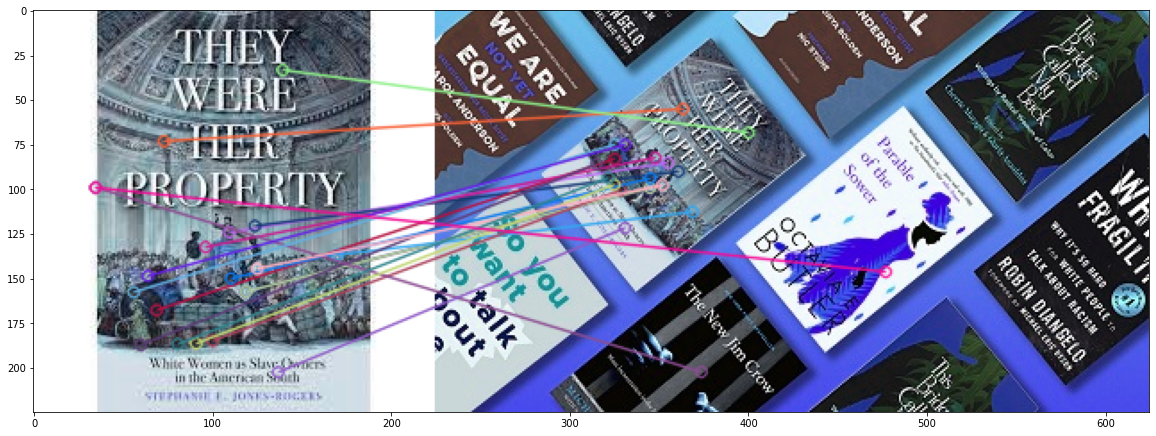

In [16]:
own_mathcher(kps1_2, descs1_2, kps2_2, descs2_2,book2,books2)

# Experiment 2

In [18]:
orbit = cv.imread('orbit.jpg')
orbits = cv.imread('orbitss.jpg')

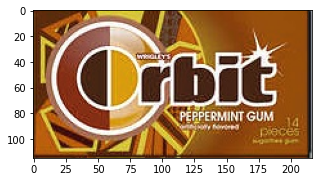

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(orbit)

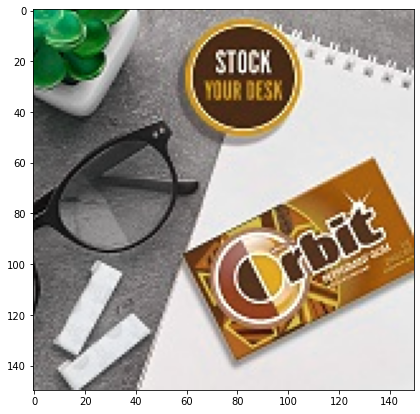

In [20]:
plt.figure(figsize=(7,7))
plt.imshow(orbits)

In [21]:
kps1_3, descs1_3, kps2_3, descs2_3 = sift_detect(orbit, orbits)

Keypoints: 218, descriptors: (218, 128)
Keypoints: 129, descriptors: (129, 128)


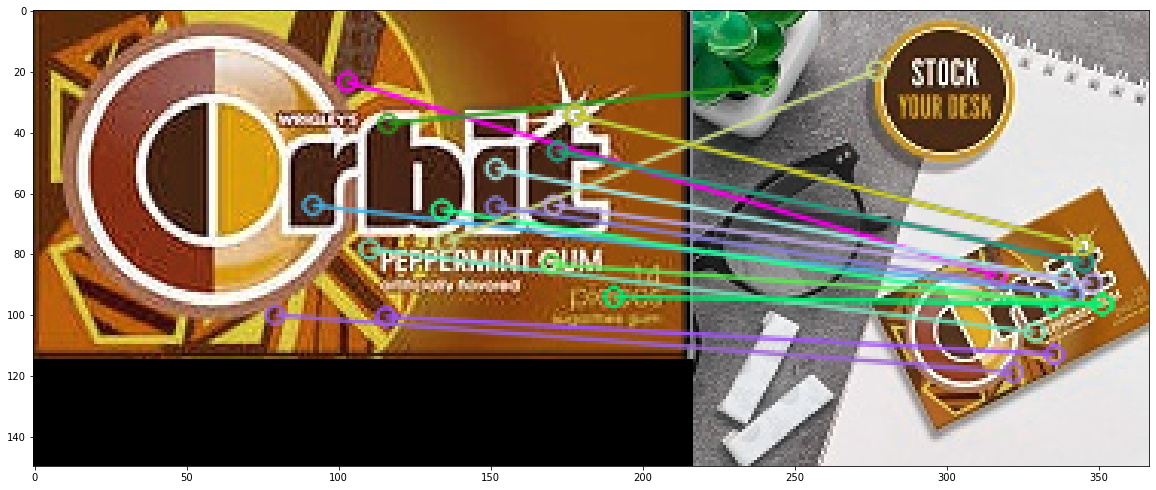

In [22]:
brute_force_opencv_matcher(kps1_3, descs1_3, kps2_3, descs2_3,orbit, orbits)

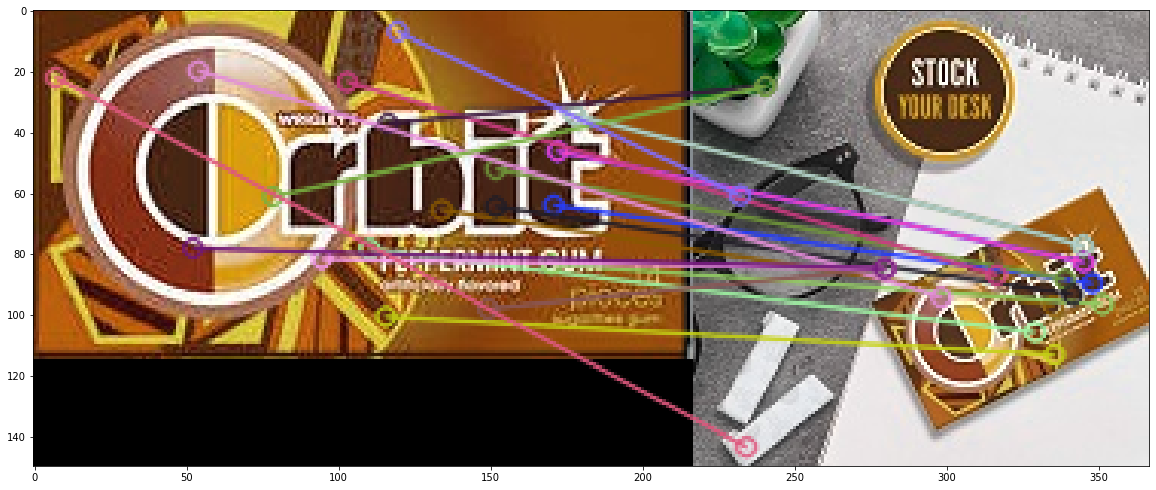

In [23]:
own_mathcher(kps1_3, descs1_3, kps2_3, descs2_3,orbit,orbits)